Load the dataset using pandas, specifying the ; separator:


In [2]:
import pandas as pd
howell_full = pd.read_csv("Howell.csv", sep=";")

Display basic information about the dataset:


In [3]:
howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


Display the first 10 rows:

In [4]:
print(howell_full.head(n=10))

    height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0
5  163.830  62.992589  35.0     1
6  149.225  38.243476  32.0     0
7  168.910  55.479971  27.0     1
8  147.955  34.869885  19.0     0
9  165.100  54.487739  54.0     1


Display basic summary statistics

In [6]:
print(howell_full.describe())

           height      weight         age        male
count  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426
std     27.602448   14.719178   20.746888    0.499699
min     53.975000    4.252425    0.000000    0.000000
25%    125.095000   22.007717   12.000000    0.000000
50%    148.590000   40.057844   27.000000    0.000000
75%    157.480000   47.209005   43.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000


Check for correlations:

In [7]:
howell_full.corr()

,height,weight,age,male
height,1.000000,0.940822,0.683689,0.139229
weight,0.940822,1.000000,0.678335,0.155443
age,0.683689,0.678335,1.000000,0.005887
male,0.139229,0.155443,0.005887,1.000000


Data Exploration and Preparation

array([[<Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='age', ylabel='height'>],
       [<Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='age', ylabel='weight'>],
       [<Axes: xlabel='height', ylabel='age'>,
        <Axes: xlabel='weight', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>]], dtype=object)

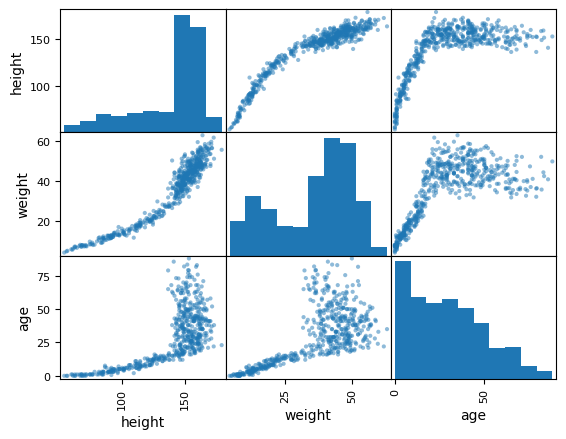

In [8]:
from pandas.plotting import scatter_matrix

attributes = ['height', 'weight', 'age']
scatter_matrix(howell_full[attributes])

Create a scatter plot of height vs weight:

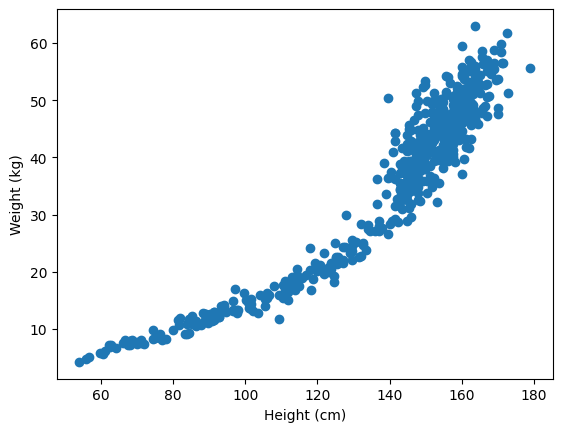

In [9]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']
plt.scatter(height, weight)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Color the scatter plot by gender:

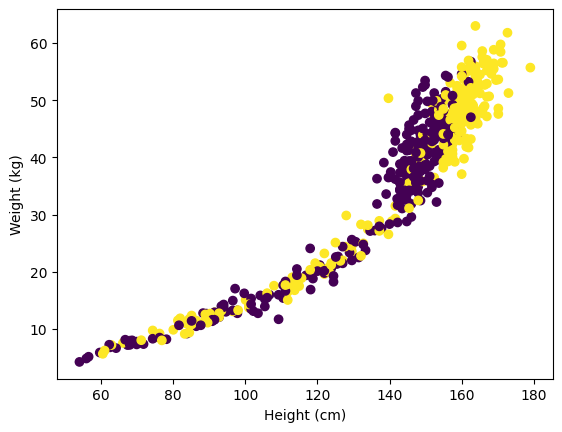

In [10]:
gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Handle missing values and clean data


In [11]:
howell_full['new'] = howell_full['male'] + howell_full['age']
howell_full.drop(axis='columns', labels='new', inplace=True)
height_median = howell_full['height'].median()
weight_average = howell_full['weight'].mean()
howell_full['height'].fillna(height_median, inplace=True)

C:\Users\dines\AppData\Local\Temp\ipykernel_16548\2564716924.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  howell_full['height'].fillna(height_median, inplace=True)


# Compute bmi based on height and weight metric units

In [13]:
def bmi(height, weight):
     return 10000*weight/(height**2)
print(bmi(150, 40))
new_feature = bmi(howell_full['height'], howell_full['weight'])
print(new_feature)
howell_full['bmi'] = new_feature
howell_full.head(n=10) 

17.77777777777778
0      20.764297
1      18.695244
2      17.095718
3      21.561444
4      19.520384
         ...    
539    14.720729
540    19.739486
541    22.155341
542    15.917698
543    20.844590
Length: 544, dtype: float64


,height,weight,age,male,bmi
0,151.765,47.825606,63.0,1,20.764297
1,139.700,36.485807,63.0,0,18.695244
2,136.525,31.864838,65.0,0,17.095718
3,156.845,53.041914,41.0,1,21.561444
4,145.415,41.276872,51.0,0,19.520384
5,163.830,62.992589,35.0,1,23.469433
6,149.225,38.243476,32.0,0,17.174108
7,168.910,55.479971,27.0,1,19.445786
8,147.955,34.869885,19.0,0,15.929099
9,165.100,54.487739,54.0,1,19.989625


In [15]:
import numpy as np

def bmi_category(bmi):
 # bmi can only be a single value
 if bmi < 18.5: return 'Underweight'
 if bmi < 25.0: return 'Normal'
 if bmi < 30.0: return 'Overweight'
 return 'Obese'

In [16]:
vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])
print(howell_full.head(n=10))
howell_full['bmi class'].value_counts()

    height     weight   age  male        bmi    bmi class
0  151.765  47.825606  63.0     1  20.764297       Normal
1  139.700  36.485807  63.0     0  18.695244       Normal
2  136.525  31.864838  65.0     0  17.095718  Underweight
3  156.845  53.041914  41.0     1  21.561444       Normal
4  145.415  41.276872  51.0     0  19.520384       Normal
5  163.830  62.992589  35.0     1  23.469433       Normal
6  149.225  38.243476  32.0     0  17.174108  Underweight
7  168.910  55.479971  27.0     1  19.445786       Normal
8  147.955  34.869885  19.0     0  15.929099  Underweight
9  165.100  54.487739  54.0     1  19.989625       Normal


bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

In [17]:
over18 = howell_full["age"] > 18
print(over18)

# Only keep the true instances
howell_adults = howell_full[over18]
howell_children = howell_full[~over18] # ~ is not in numpy
print("There are ", len(howell_adults), " adult instances")
print(howell_adults)
print("There are ", len(howell_children), " child instances")
print(howell_children) 

0       True
1       True
2       True
3       True
4       True
       ...  
539    False
540     True
541     True
542    False
543     True
Name: age, Length: 544, dtype: bool
There are  346  adult instances
      height     weight   age  male        bmi    bmi class
0    151.765  47.825606  63.0     1  20.764297       Normal
1    139.700  36.485807  63.0     0  18.695244       Normal
2    136.525  31.864838  65.0     0  17.095718  Underweight
3    156.845  53.041914  41.0     1  21.561444       Normal
4    145.415  41.276872  51.0     0  19.520384       Normal
..       ...        ...   ...   ...        ...          ...
534  162.560  47.031821  27.0     0  17.797722  Underweight
537  142.875  34.246196  31.0     0  16.776442  Underweight
540  162.560  52.163080  31.0     1  19.739486       Normal
541  156.210  54.062497  21.0     0  22.155341       Normal
543  158.750  52.531624  68.0     1  20.844590       Normal

[346 rows x 6 columns]
There are  198  child instances
      height 

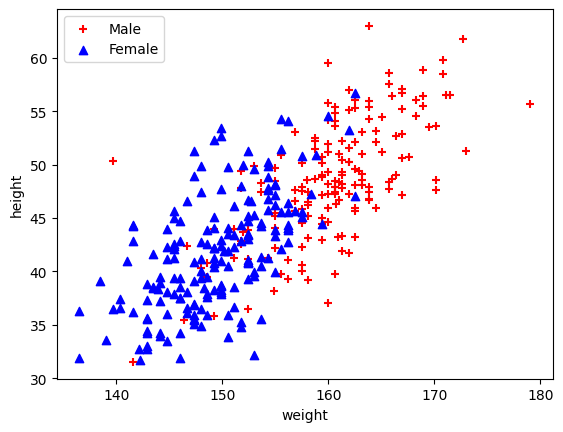

In [18]:
import matplotlib.pyplot as plt

male_height = np.ma.masked_where(howell_adults['male']==0, howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1, howell_adults['height'])
weight = howell_adults['weight']
plt.scatter(male_height, weight, c='red', marker='+')
plt.scatter(female_height, weight, c='blue', marker='^')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(['Male', 'Female'])
plt.show()

Split the Data for Training and Testing

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(howell_adults,test_size=0.2, random_state=123)

print('Train size: ', len(train_set), 'Test size: ', len(test_set))
print('Adult counts', howell_adults['male'].value_counts())
print('Train counts', train_set['male'].value_counts())
print('Test counts', test_set['male'].value_counts())  

Train size:  276 Test size:  70
Adult counts male
0    182
1    164
Name: count, dtype: int64
Train counts male
0    141
1    135
Name: count, dtype: int64
Test counts male
0    41
1    29
Name: count, dtype: int64


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=123)

for train_indices, test_indices in splitter.split(howell_adults,howell_adults['male']):
 train_set = howell_adults.iloc[train_indices]
 test_set = howell_adults.iloc[test_indices]

print('Train size: ', len(train_set), 'Test size: ', len(test_set))
print('Adult counts', howell_adults['male'].value_counts())
print('Train counts', train_set['male'].value_counts())
print('Test counts', test_set['male'].value_counts())

Train size:  276 Test size:  70
Adult counts male
0    182
1    164
Name: count, dtype: int64
Train counts male
0    145
1    131
Name: count, dtype: int64
Test counts male
0    37
1    33
Name: count, dtype: int64
